# CIC IDS 2017 dataset
------------------------------------------------

<div>
    <b>Aim</b>: This notebook provide you with a way to create a clean CIC IDS dataset using all the .csv files.</div>

<br>

<div>
    <b>Dataset description</b>: The CIC IDS 2017 dataset, which has been created by the <a href="https://www.unb.ca/cic/datasets/ids-2017.html">Canadian Institute for Cyber-security (CIC)</a>, consists of labeled network flows. The CIC IDS 2017 contains benign and the most up-to-date common attacks. It is made up of 2,830,743 records with a total of 78 features.
</div>

In [4]:
import pandas as pd
import numpy as np
import glob

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_theme(style="white", color_codes=True)
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False)

## Data Cleaning
------------------------------------------------

### Get data

In [8]:
def clean_column_name(column):
    column = column.strip(' ')
    column = column.replace('/', '_')
    column = column.replace(' ', '_')
    column = column.lower()
    return column

In [10]:
# Read all the .csv files
filenames = glob.glob('../../../Dataset/CIC-IDS/MachineLearningCVE/*.csv')
datasets = [pd.read_csv(filename) for filename in filenames]

# Remove white spaces and rename the columns
for dataset in datasets:
    dataset.columns = [clean_column_name(column) for column in dataset.columns]

# Concatenate the datasets
dataset = pd.concat(datasets, axis=0, ignore_index=True)
dataset.drop(labels=['fwd_header_length.1'], axis= 1, inplace=True)

Have an initia inspection of the data

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542141 entries, 0 to 2542140
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int64  
 1   flow_duration                int64  
 2   total_fwd_packets            int64  
 3   total_backward_packets       int64  
 4   total_length_of_fwd_packets  int64  
 5   total_length_of_bwd_packets  int64  
 6   fwd_packet_length_max        int64  
 7   fwd_packet_length_min        int64  
 8   fwd_packet_length_mean       float64
 9   fwd_packet_length_std        float64
 10  bwd_packet_length_max        int64  
 11  bwd_packet_length_min        int64  
 12  bwd_packet_length_mean       float64
 13  bwd_packet_length_std        float64
 14  flow_bytes_s                 float64
 15  flow_packets_s               float64
 16  flow_iat_mean                float64
 17  flow_iat_std                 float64
 18  flow_iat_max                 int64  
 19  

In [14]:
dataset.head(5)

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3000000.0,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000.0,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3000000.0,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000.0,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [16]:
dataset.describe(include=[int, float])

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.540801e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2542141.0,2542141.0,2542141.0,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2542141.0,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2542141.0,2542141.0,2542141.0,2542141.0,2542141.0,2542141.0,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06
mean,8.057795e+03,1.544539e+07,9.716660e+00,1.086743e+01,5.473822e+02,1.729797e+04,2.151780e+02,1.888957e+01,6.007840e+01,7.210913e+01,9.327081e+02,4.112069e+01,3.255762e+02,3.618935e+02,inf,inf,1.377428e+06,3.128986e+06,9.879012e+06,1.723543e+05,1.513657e+07,2.763092e+06,3.541409e+06,9.735627e+06,1.057119e+06,1.008345e+07,1.869341e+06,1.579520e+06,4.924546e+06,9.908030e+05,4.760830e-02,0.0,0.0,0.0,-2.896725e+04,-2.549577e+03,6.053314e+04,6.743668e+03,1.641105e+01,1.017113e+03,1.817529e+02,3.162530e+02,5.340726e+05,3.743734e-02,4.760830e-02,2.391685e-04,2.857493e-01,3.256904e-01,9.588965e-02,0.0,2.403486e-04,6.878352e-01,2.027741e+02,6.007840e+01,3.255762e+02,0.0,0.0,0.0,0.0,0.0,0.0,9.716660e+00,5.473822e+02,1.086743e+01,1.729761e+04,7.148799e+03,2.034795e+03,5.643280e+00,-3.055860e+03,8.384228e+04,4.108791e+04,1.555291e+05,6.058808e+04,8.963907e+06,5.473023e+05,9.376316e+06,8.537139e+06
std,1.836861e+04,3.421694e+07,7.906831e+02,1.051811e+03,5.843776e+03,2.387238e+06,7.420455e+02,6.275191e+01,1.921477e+02,2.928974e+02,2.028721e+03,6.943086e+01,6.291510e+02,8.779464e+02,NaN,NaN,4.624813e+06,8.319251e+06,2.543532e+07,3.039023e+06,3.414604e+07,9.721190e+06,1.007803e+07,2.551218e+07,8.732086e+06,2.895495e+07,9.020598e+06,6.545111e+06,1.772598e+07,8.411019e+06,2.129361e-01,0.0,0.0,0.0,2.221577e+07,1.532425e+06,2.422692e+05,3.778063e+04,2.550328e+01,2.111786e+03,3.155076e+02,6.588527e+02,1.730580e+06,1.898310e-01,2.129361e-01,1.546323e-02,4.517706e-01,4.686323e-01,2.944399e-01,0.0,1.550132e-02,6.796655e-01,3.431654e+02,1.921477e+02,6.291510e+02,0.0,0.0,0.0,0.0,0.0,0.0,7.906831e+02,5.843776e+03,1.051811e+03,2.387206e+06,1.447264e+04,8.520327e+03,6.713710e+02,1.144922e+06,6.616263e+05,3.951051e+05,1.036473e+06,5.905

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.540801e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2542141.0,2542141.0,2542141.0,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2542141.0,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2542141.0,2542141.0,2542141.0,2542141.0,2542141.0,2542141.0,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06
mean,8.057795e+03,1.544539e+07,9.716660e+00,1.086743e+01,5.473822e+02,1.729797e+04,2.151780e+02,1.888957e+01,6.007840e+01,7.210913e+01,9.327081e+02,4.112069e+01,3.255762e+02,3.618935e+02,inf,inf,1.377428e+06,3.128986e+06,9.879012e+06,1.723543e+05,1.513657e+07,2.763092e+06,3.541409e+06,9.735627e+06,1.057119e+06,1.008345e+07,1.869341e+06,1.579520e+06,4.924546e+06,9.908030e+05,4.760830e-02,0.0,0.0,0.0,-2.896725e+04,-2.549577e+03,6.053314e+04,6.743668e+03,1.641105e+01,1.017113e+03,1.817529e+02,3.162530e+02,5.340726e+05,3.743734e-02,4.760830e-02,2.391685e-04,2.857493e-01,3.256904e-01,9.588965e-02,0.0,2.403486e-04,6.878352e-01,2.027741e+02,6.007840e+01,3.255762e+02,0.0,0.0,0.0,0.0,0.0,0.0,9.716660e+00,5.473822e+02,1.086743e+01,1.729761e+04,7.148799e+03,2.034795e+03,5.643280e+00,-3.055860e+03,8.384228e+04,4.108791e+04,1.555291e+05,6.058808e+04,8.963907e+06,5.473023e+05,9.376316e+06,8.537139e+06
std,1.836861e+04,3.421694e+07,7.906831e+02,1.051811e+03,5.843776e+03,2.387238e+06,7.420455e+02,6.275191e+01,1.921477e+02,2.928974e+02,2.028721e+03,6.943086e+01,6.291510e+02,8.779464e+02,NaN,NaN,4.624813e+06,8.319251e+06,2.543532e+07,3.039023e+06,3.414604e+07,9.721190e+06,1.007803e+07,2.551218e+07,8.732086e+06,2.895495e+07,9.020598e+06,6.545111e+06,1.772598e+07,8.411019e+06,2.129361e-01,0.0,0.0,0.0,2.221577e+07,1.532425e+06,2.422692e+05,3.778063e+04,2.550328e+01,2.111786e+03,3.155076e+02,6.588527e+02,1.730580e+06,1.898310e-01,2.129361e-01,1.546323e-02,4.517706e-01,4.686323e-01,2.944399e-01,0.0,1.550132e-02,6.796655e-01,3.431654e+02,1.921477e+02,6.291510e+02,0.0,0.0,0.0,0.0,0.0,0.0,7.906831e+02,5.843776e+03,1.051811e+03,2.387206e+06,1.447264e+04,8.520327e+03,6.713710e+02,1.144922e+06,6.616263e+05,3.951051e+05,1.036473e+06,5.905

In [18]:
dataset.describe(include=[object]).transpose()

,count,unique,top,freq
label,2199282,14,BENIGN,1808965


,count,unique,top,freq
label,2199282,14,BENIGN,1808965


### Dealing with duplicates

We first check if there are duplicates after combining the eight .csv file.

In [20]:
dataset.duplicated().any()

False

False

As we can see from above, there are duplicates and we need get rid of them. 

In [22]:
print('Data size BEFORE deleteting instances with duplicate values: ', dataset.shape[0], end='\n\n')

# Remove duplicate rows
dataset.drop_duplicates(inplace=True, keep=False, ignore_index=True)

print('Data size AFTER deleteting instances containing duplicate values: ', dataset.shape[0])

Data size BEFORE deleteting instances with duplicate values:  2199282

Data size BEFORE deleteting instances with duplicate values:  2199282

Data size AFTER deleteting instances containing duplicate values:  2199282
Data size AFTER deleteting instances containing duplicate values:  2199282


### Dealing with missing values

Then, we check if there are missing values in each feature.

In [24]:
dataset.isnull().sum().sum()

320

320

As we can see from above, there are 334 missing values in this **CIC-IDS-2017** dataset.

We have a few options to deal with missing values:
1. Get rid of the corresponding instances.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).
4. Use imputation methods.

In [26]:
dataset.isnull().sum() / dataset.shape[0]

destination_port               0.0
flow_duration                  0.0
total_fwd_packets              0.0
total_backward_packets         0.0
total_length_of_fwd_packets    0.0
                              ... 
idle_mean                      0.0
idle_std                       0.0
idle_max                       0.0
idle_min                       0.0
label                          0.0
Length: 78, dtype: float64

destination_port               0.0
flow_duration                  0.0
total_fwd_packets              0.0
total_backward_packets         0.0
total_length_of_fwd_packets    0.0
                              ... 
idle_mean                      0.0
idle_std                       0.0
idle_max                       0.0
idle_min                       0.0
label                          0.0
Length: 78, dtype: float64

The number of instances in the dataset is large enough and the fraction of intances with missing values is small, an easy way is simply to remove those instances containing missing values. However, we need to first ensure that the missing values are not related to a specific label.

In [28]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

Index([], dtype='object')

All the missing values come from the `flow_bytes_s`.

In [30]:
dataset[dataset['flow_bytes_s'].isnull()].label.unique()

array([], dtype=object)

array([], dtype=object)

And all the missing values are related to one single label which is the `BENIGN` label.

In [32]:
print('Data size BEFORE deleteting instances with missing values: ', dataset.shape[0], end='\n\n')

# Remove missing values
dataset.dropna(axis=0, inplace=True, how="any")

print('Data size AFTER deleteting instances containing missing values: ', dataset.shape[0])

Data size BEFORE deleteting instances with missing values:  2198962

Data size BEFORE deleteting instances with missing values:  2198962

Data size AFTER deleteting instances containing missing values:  2197973
Data size AFTER deleteting instances containing missing values:  2197973


### Dealing with infinite values

Checking if all values are finite.

In [34]:
np.all(np.isfinite(dataset.drop(['label'], axis=1)))

True

True

In [36]:
# Replace infinite values to NaN
dataset.replace([-np.inf, np.inf], np.nan, inplace=True)

# Check which labels are related to infinte values
dataset[(dataset['flow_bytes_s'].isnull()) & (dataset['flow_packets_s'].isnull())].label.unique()

array([], dtype=object)

array([], dtype=object)

In [38]:
print('Data size BEFORE deleteting instances with infinite values: ', dataset.shape[0], end='\n\n')

# Remove infinte values
dataset.dropna(axis=0, how='any', inplace=True)

print('Data size AFTER deleteting instances containing infinite values: ', dataset.shape[0])

Data size BEFORE deleteting instances with infinite values:  2197973

Data size BEFORE deleteting instances with infinite values:  2197973

Data size AFTER deleteting instances containing infinite values:  2197973
Data size AFTER deleteting instances containing infinite values:  2197973


### Dealing with features with quasi null std deviation

Standard deviation denoted by sigma (σ) is the average of the squared root differences from the mean.

In [40]:
dataset_std = dataset.std()
dataset_std

/var/folders/cg/tzz7k9r96r7cjj5l0x2ghds40000gn/T/ipykernel_2413/2979618005.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_std = dataset.std()


destination_port               1.930537e+04
flow_duration                  3.620060e+07
total_fwd_packets              8.503302e+02
total_backward_packets         1.131159e+03
total_length_of_fwd_packets    6.280524e+03
                                   ...     
active_min                     6.345669e+05
idle_mean                      2.616746e+07
idle_std                       5.182619e+06
idle_max                       2.697308e+07
idle_min                       2.590092e+07
Length: 67, dtype: float64

/var/folders/cg/tzz7k9r96r7cjj5l0x2ghds40000gn/T/ipykernel_2413/2979618005.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_std = dataset.std()


destination_port               1.930537e+04
flow_duration                  3.620060e+07
total_fwd_packets              8.503302e+02
total_backward_packets         1.131159e+03
total_length_of_fwd_packets    6.280524e+03
                                   ...     
active_min                     6.345669e+05
idle_mean                      2.616746e+07
idle_std                       5.182619e+06
idle_max                       2.697308e+07
idle_min                       2.590092e+07
Length: 67, dtype: float64

In [42]:
# Find Features that meet the threshold
constant_features = [column for column, std in dataset_std.iteritems() if std < 0.01]

# Drop the constant features
dataset.drop(labels=constant_features, axis=1, inplace=True)

Some features such as `bwd_psh_flags`, `bwd_urg_flags`, `fwd_avg_bytes_bulk`, `fwd_avg_packets_bulk`, `fwd_avg_bulk_rate`, `bwd_avg_bytes_bulk`, `bwd_avg_packets_bulk`, `bwd_avg_bulk_rate` don't vary. Hence, the correlation is NaN by definition.

### Dealing with outliers

In [44]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers with interquartile range
filt = (dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))
print(filt.sum())

/var/folders/cg/tzz7k9r96r7cjj5l0x2ghds40000gn/T/ipykernel_2413/2429677622.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filt = (dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))
/var/folders/cg/tzz7k9r96r7cjj5l0x2ghds40000gn/T/ipykernel_2413/2429677622.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filt = (dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))


ack_flag_count                      0
act_data_pkt_fwd               171204
active_max                     521882
active_mean                    521882
active_min                     521882
                                ...  
total_backward_packets         213375
total_fwd_packets              225993
total_length_of_bwd_packets    388978
total_length_of_fwd_packets    279415
urg_flag_count                 229538
Length: 68, dtype: int64
ack_flag_count                      0
act_data_pkt_fwd               171204
active_max                     521882
active_mean                    521882
active_min                     521882
                                ...  
total_backward_packets         213375
total_fwd_packets              225993
total_length_of_bwd_packets    388978
total_length_of_fwd_packets    279415
urg_flag_count                 229538
Length: 68, dtype: int64


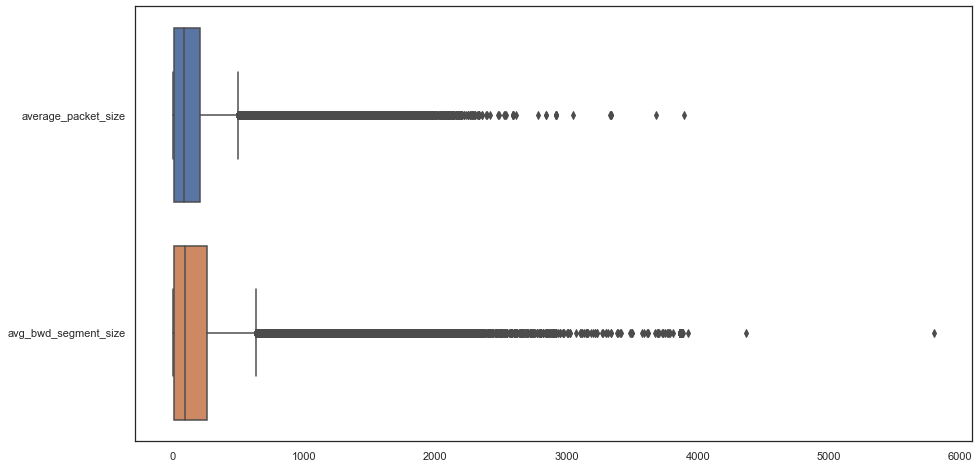

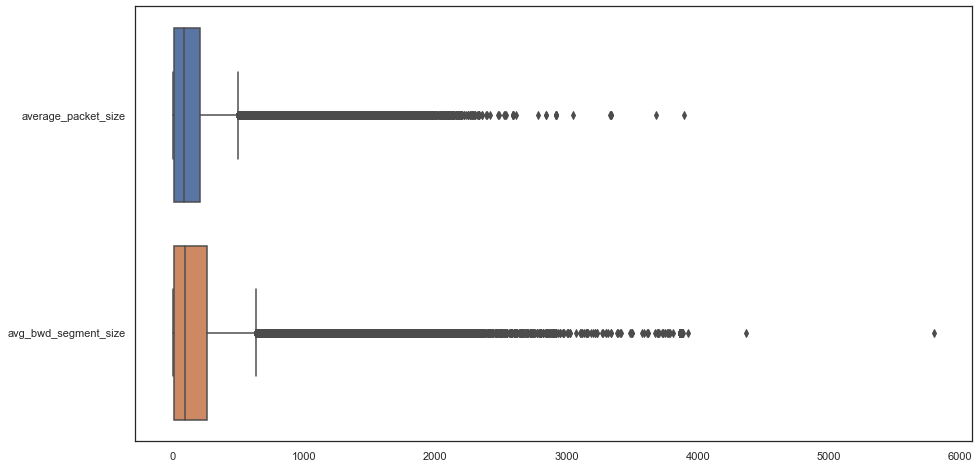

In [46]:
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset[["average_packet_size", "avg_bwd_segment_size"]], orient="h")

#plt.title('Summary of some variables containing outliers', fontsize=18)
plt.show()
fig.savefig('../../images/outliers.pdf')

In [48]:
dataset[['flow_bytes_s', 'flow_packets_s']] = dataset[['flow_bytes_s', 'flow_packets_s']].apply(pd.to_numeric)

Create a new feature `Port Category`

In [50]:
conds = [
    (dataset['destination_port'] >= 1) & (dataset['destination_port'] < 1024),
    (dataset['destination_port'] >= 1024) & (dataset['destination_port'] < 49152),
    (dataset['destination_port'] >= 49152) & (dataset['destination_port'] <= 65535)
]

choices = [
    "1 - 1023", 
    "1024 - 49151",
    "49152 - 65535"
]

dataset.insert(1, 'destination_port_category', np.select(conds, choices, default="0"))

ValueError: cannot insert destination_port_category, already exists

ValueError: cannot insert destination_port_category, already exists

## Data Exploration
------------------------------------------------

### Correlation Matrix

In [55]:
dataset.rename(columns={'total_length_of_fwd_packets': 'fwd_packet_length_tot', 'total_length_of_bwd_packets': 'bwd_packet_length_tot'}, inplace=True)
dataset_corr = dataset.corr()
dataset_corr.head(5)

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,fwd_packet_length_tot,bwd_packet_length_tot,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
destination_port,1.000000,-0.178929,-0.004728,-0.004409,0.015448,-0.003504,0.100563,-0.038846,0.146713,0.132449,-0.223519,-0.260265,-0.249693,-0.201206,0.071597,0.372279,-0.119569,-0.138968,-0.137644,-0.024142,-0.178244,-0.112430,-0.117272,-0.136420,-0.057334,-0.120677,-0.077683,-0.041330,-0.061300,-0.056777,0.244761,0.000494,0.000823,0.360479,0.153120,-0.252499,-0.150935,-0.181643,-0.147004,-0.083742,-0.049363,0.244761,-0.007201,-0.231993,0.590513,0.539066,-0.007101,0.042657,-0.182612,0.146713,-0.249693,-0.004728,0.015448,-0.004409,-0.003504,-0.139748,0.219220,-0.003609,0.001082,-0.040656,-0.048855,-0.058681,-0.027109,-0.134916,0.007467,-0.130338,-0.136592
flow_duration,-0.178929,1.000000,0.020189,0.019118,0.104194,0.016046,0.253447,-0.116621,0.131556,0.217638,0.483401,-0.247358,0.449163,0.432011,-0.025868,-0.110477,0.540693,0.744206,0.788529,0.058417,0.998554,0.548826,0.730266,0.788317,0.205939,0.806100,0.405120,0.513509,0.575155,0.208926,-0.023513,-0.000053,-0.001044,-0.101200,-0.076046,-0.254923,0.499552,0.416081,0.442653,0.270809,0.228878,-0.023513,0.007442,0.180175,0.038399,-0.124408,0.007383,-0.167473,0.393291,0.131556,0.449163,0.020189,0.104194,0.019118,0.016045,0.077630,-0.044277,0.015514,-0.001187,0.181951,0.233609,0.283727,0.116263,0.772315,0.242671,0.784477,0.741633
total_fwd_packets,-0.004728,0.020189,1.000000,0.999133,0.644737,0.997071,0.008591,-0.003187,-0.000613,0.000734,0.021826,-0.006028,0.020336,0.005455,0.000436,-0.002268,-0.001631,-0.001336,0.001290,-0.000612,0.019855,-0.001609,-0.000739,0.000853,-0.001345,0.023743,-0.001059,0.000130,0.002579,-0.001199,0.001908,0.000477,0.013739,-0.002098,-0.001462,-0.006755,0.021001,0.023475,0.010923,0.004697,-0.001444,0.001908,0.000358,0.007115,0.001501,-0.003866,0.000356,0.001129,0.021107,-0.000613,0.020336,1.000000,0.644737,0.999133,0.997065,0.003331,-0.000942,0.887504,-0.000179,0.040069,0.007492,0.030227,0.041674,0.000852,0.000468,0.000917,0.000746
total_backward_packets,-0.004409,0.019118,0.999133,1.000000,0.641471,0.994503,0.008349,-0.002760,-0.000843,0.000429,0.021645,-0.005339,0.020459,0.005171,0.000393,-0.002299,-0.001953,-0.001776,0.000866,-0.000635,0.018768,-0.001768,-0.001227,0.000417,-0.001214,0.023267,-0.001191,-0.000032,0.002689,-0.001151,0.001754,0.000758,0.013752,-0.002178,-0.001211,-0.006131,0.020783,0.023930,0.010823,0.004689,-0.001287,0.001754,0.000219,0.006508,0.001368,-0.003233,0.000218,0.003411,0.021570,-0.000843,0.020459,0.999133,0.641471,1.000000,0.994498,0.002773,-0.000902,0.882869,0.000023,0.039308,0.005796,0.028642,0.041800,0.000499,0.000172,0.000510,0.000444
fwd_packet_length_tot,0.015448,0.104194,0.644737,0.641471,1.000000,0.638430,0.331792,-0.007653,0.299552,0.271065,0.032805,-0.047309,0.025656,0.010334,0.003097,-0.019745,0.004358,0.021493,0.040979,-0.005407,0.102786,0.007314,0.036329,0.041232,-0.010951,0.126861,0.011549,0.060975,0.068591,-0.009074,0.011992,-0.00

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,fwd_packet_length_tot,bwd_packet_length_tot,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
destination_port,1.000000,-0.178929,-0.004728,-0.004409,0.015448,-0.003504,0.100563,-0.038846,0.146713,0.132449,-0.223519,-0.260265,-0.249693,-0.201206,0.071597,0.372279,-0.119569,-0.138968,-0.137644,-0.024142,-0.178244,-0.112430,-0.117272,-0.136420,-0.057334,-0.120677,-0.077683,-0.041330,-0.061300,-0.056777,0.244761,0.000494,0.000823,0.360479,0.153120,-0.252499,-0.150935,-0.181643,-0.147004,-0.083742,-0.049363,0.244761,-0.007201,-0.231993,0.590513,0.539066,-0.007101,0.042657,-0.182612,0.146713,-0.249693,-0.004728,0.015448,-0.004409,-0.003504,-0.139748,0.219220,-0.003609,0.001082,-0.040656,-0.048855,-0.058681,-0.027109,-0.134916,0.007467,-0.130338,-0.136592
flow_duration,-0.178929,1.000000,0.020189,0.019118,0.104194,0.016046,0.253447,-0.116621,0.131556,0.217638,0.483401,-0.247358,0.449163,0.432011,-0.025868,-0.110477,0.540693,0.744206,0.788529,0.058417,0.998554,0.548826,0.730266,0.788317,0.205939,0.806100,0.405120,0.513509,0.575155,0.208926,-0.023513,-0.000053,-0.001044,-0.101200,-0.076046,-0.254923,0.499552,0.416081,0.442653,0.270809,0.228878,-0.023513,0.007442,0.180175,0.038399,-0.124408,0.007383,-0.167473,0.393291,0.131556,0.449163,0.020189,0.104194,0.019118,0.016045,0.077630,-0.044277,0.015514,-0.001187,0.181951,0.233609,0.283727,0.116263,0.772315,0.242671,0.784477,0.741633
total_fwd_packets,-0.004728,0.020189,1.000000,0.999133,0.644737,0.997071,0.008591,-0.003187,-0.000613,0.000734,0.021826,-0.006028,0.020336,0.005455,0.000436,-0.002268,-0.001631,-0.001336,0.001290,-0.000612,0.019855,-0.001609,-0.000739,0.000853,-0.001345,0.023743,-0.001059,0.000130,0.002579,-0.001199,0.001908,0.000477,0.013739,-0.002098,-0.001462,-0.006755,0.021001,0.023475,0.010923,0.004697,-0.001444,0.001908,0.000358,0.007115,0.001501,-0.003866,0.000356,0.001129,0.021107,-0.000613,0.020336,1.000000,0.644737,0.999133,0.997065,0.003331,-0.000942,0.887504,-0.000179,0.040069,0.007492,0.030227,0.041674,0.000852,0.000468,0.000917,0.000746
total_backward_packets,-0.004409,0.019118,0.999133,1.000000,0.641471,0.994503,0.008349,-0.002760,-0.000843,0.000429,0.021645,-0.005339,0.020459,0.005171,0.000393,-0.002299,-0.001953,-0.001776,0.000866,-0.000635,0.018768,-0.001768,-0.001227,0.000417,-0.001214,0.023267,-0.001191,-0.000032,0.002689,-0.001151,0.001754,0.000758,0.013752,-0.002178,-0.001211,-0.006131,0.020783,0.023930,0.010823,0.004689,-0.001287,0.001754,0.000219,0.006508,0.001368,-0.003233,0.000218,0.003411,0.021570,-0.000843,0.020459,0.999133,0.641471,1.000000,0.994498,0.002773,-0.000902,0.882869,0.000023,0.039308,0.005796,0.028642,0.041800,0.000499,0.000172,0.000510,0.000444
fwd_packet_length_tot,0.015448,0.104194,0.644737,0.641471,1.000000,0.638430,0.331792,-0.007653,0.299552,0.271065,0.032805,-0.047309,0.025656,0.010334,0.003097,-0.019745,0.004358,0.021493,0.040979,-0.005407,0.102786,0.007314,0.036329,0.041232,-0.010951,0.126861,0.011549,0.060975,0.068591,-0.009074,0.011992,-0.00

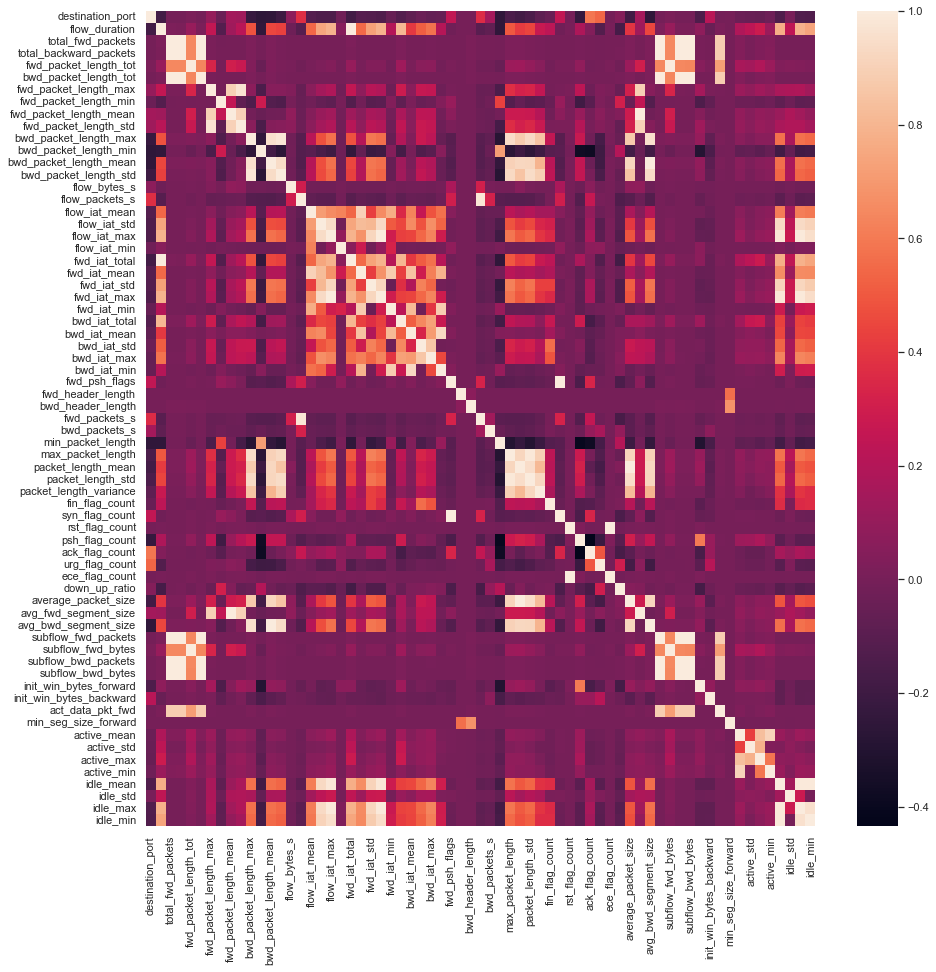

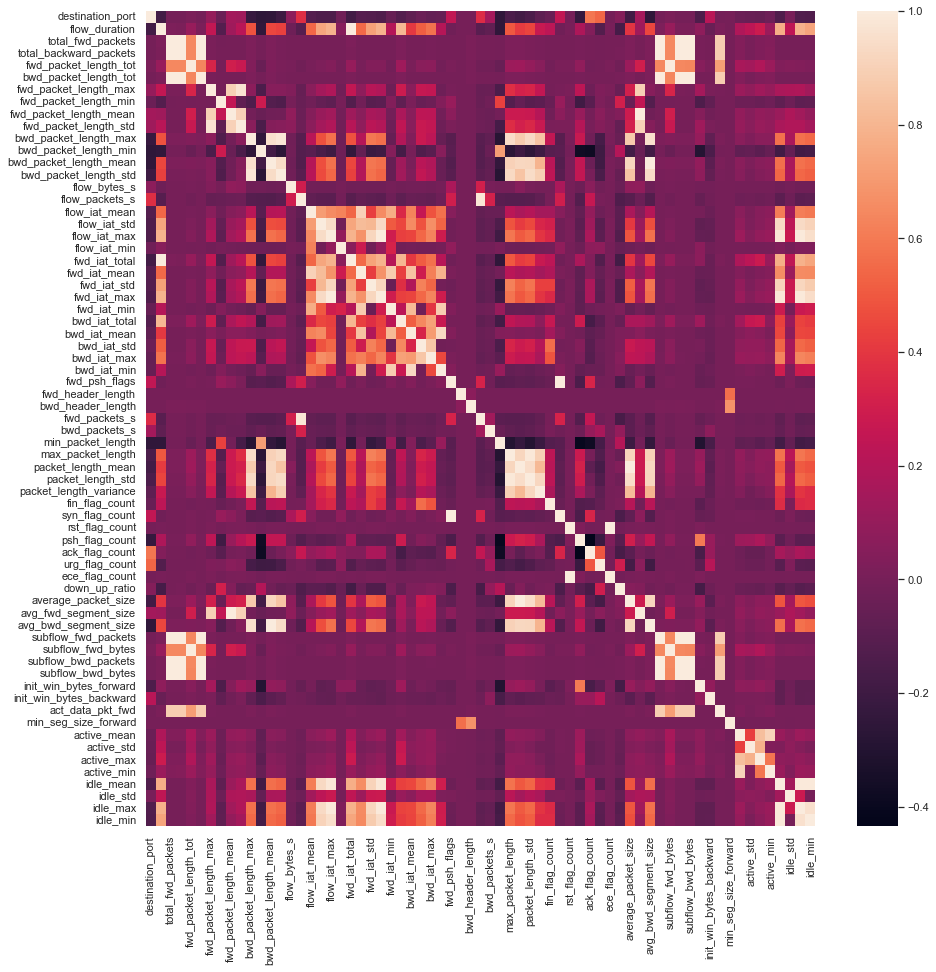

In [56]:
fig = plt.figure(figsize=(15, 15))
sns.set(font_scale=1.0)
ax = sns.heatmap(dataset_corr, annot=False)
fig.savefig('../../images/correlation matrix.pdf')

We can see that some features seems to be highly correlated. Hence, we might need to remove them since there are bringing redundant information

In [57]:
# Create & Apply mask
mask = np.triu(np.ones_like(dataset_corr, dtype=bool))
tri_df = dataset_corr.mask(mask)

# Find Features that meet the threshold
correlated_features = [c for c in tri_df.columns if any(tri_df[c] > 0.98)]

# Drop the highly correlated features
dataset.drop(labels=correlated_features, axis=1, inplace=True)

### Label 

In [58]:
dataset['label'].value_counts()

BENIGN                        1807787
DoS Hulk                       171509
DDoS                           128005
PortScan                        57305
DoS GoldenEye                   10279
FTP-Patator                      5480
DoS slowloris                    5289
DoS Slowhttptest                 5176
SSH-Patator                      3071
Bot                              1943
Web Attack � Brute Force         1445
Web Attack � XSS                  652
Web Attack � Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64

BENIGN                        1807787
DoS Hulk                       171509
DDoS                           128005
PortScan                        57305
DoS GoldenEye                   10279
FTP-Patator                      5480
DoS slowloris                    5289
DoS Slowhttptest                 5176
SSH-Patator                      3071
Bot                              1943
Web Attack � Brute Force         1445
Web Attack � XSS                  652
Web Attack � Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64

/Users/othmanebelarbi/Desktop/Toshiba/DBN-FL/venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/othmanebelarbi/Desktop/Toshiba/DBN-FL/venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/othmanebelarbi/Desktop/Toshiba/DBN-FL/venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/othmanebelarbi/Desktop/Toshiba/DBN-FL/venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


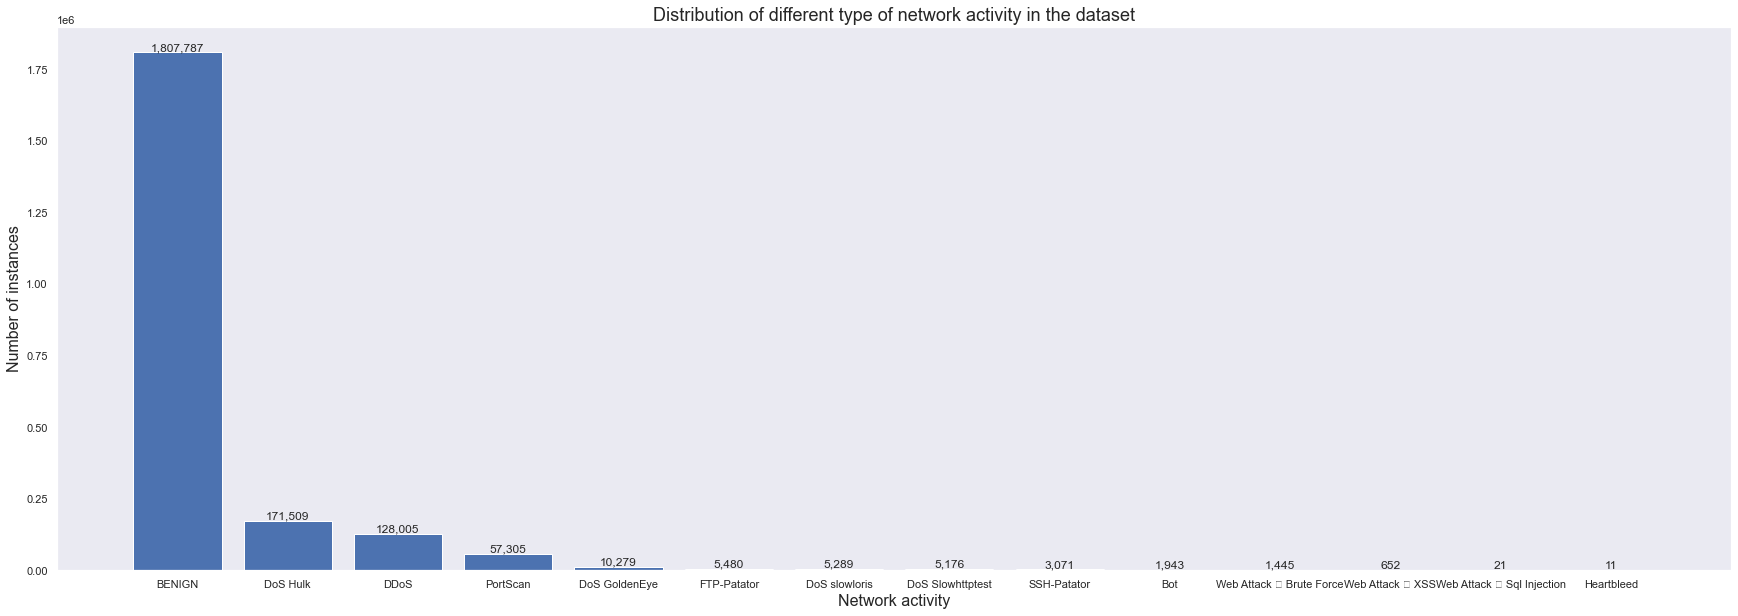

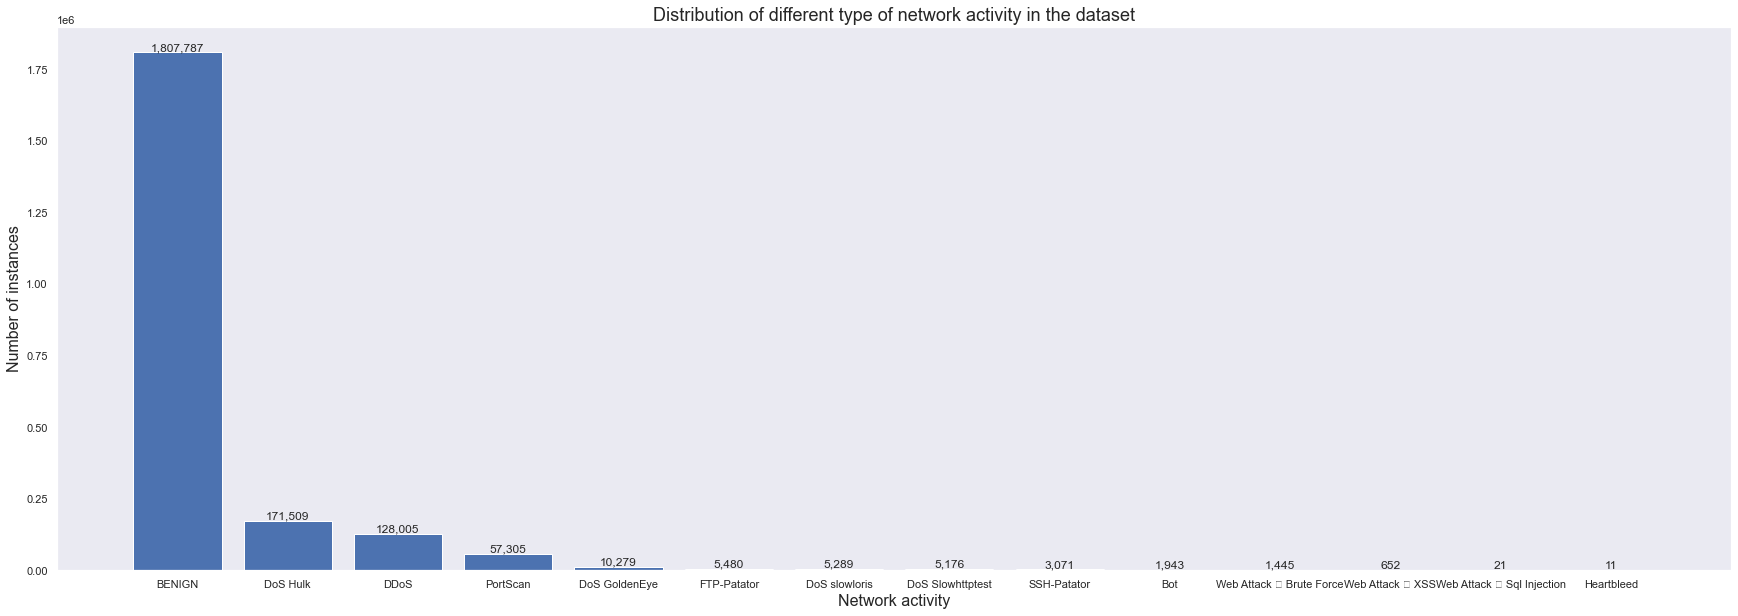

/Users/othmanebelarbi/Desktop/Toshiba/DBN-FL/venv/lib/python3.9/site-packages/matplotlib/backends/_backend_pdf_ps.py:109: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/Users/othmanebelarbi/Desktop/Toshiba/DBN-FL/venv/lib/python3.9/site-packages/matplotlib/backends/_backend_pdf_ps.py:109: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


In [59]:
fig = plt.figure(figsize=(30,10))

attack = dataset['label'].value_counts()

attack_count = attack.values
attack_type = attack.index

bar = plt.bar(attack_type, attack_count, align='center')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ','), ha='center', va='bottom')

plt.title('Distribution of different type of network activity in the dataset', fontsize=18)
plt.xlabel('Network activity', fontsize=16)
plt.ylabel('Number of instances', fontsize=16)
plt.grid()
plt.show()
fig.savefig('../../images/network_activity.pdf')

The dataset is clearly imbalaced and we need to deal with it. We can merge few minority classes having similar characteristics and behavior to form new attack classes.

In [62]:
dataset['label'] = dataset['label'].str.replace('Web Attack �', 'Web Attack', regex=False)

# Proposed Groupings
attack_group = {
    'BENIGN': 'Benign',
    'PortScan': 'PortScan',
    'DDoS': 'DoS/DDoS',
    'DoS Hulk': 'DoS/DDoS',
    'DoS GoldenEye': 'DoS/DDoS',
    'DoS slowloris': 'DoS/DDoS', 
    'DoS Slowhttptest': 'DoS/DDoS',
    'Heartbleed': 'DoS/DDoS',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Botnet ARES',
    'Web Attack Brute Force': 'Web Attack',
    'Web Attack Sql Injection': 'Web Attack',
    'Web Attack XSS': 'Web Attack',
    'Infiltration': 'Infiltration'
}

# Create grouped label column
dataset['label_category'] = dataset['label'].map(lambda x: attack_group[x])
dataset['label_category'].value_counts()

Benign         1807787
DoS/DDoS        320269
PortScan         57305
Brute Force       8551
Web Attack        2118
Botnet ARES       1943
Name: label_category, dtype: int64

Benign         1807787
DoS/DDoS        320269
PortScan         57305
Brute Force       8551
Web Attack        2118
Botnet ARES       1943
Name: label_category, dtype: int64

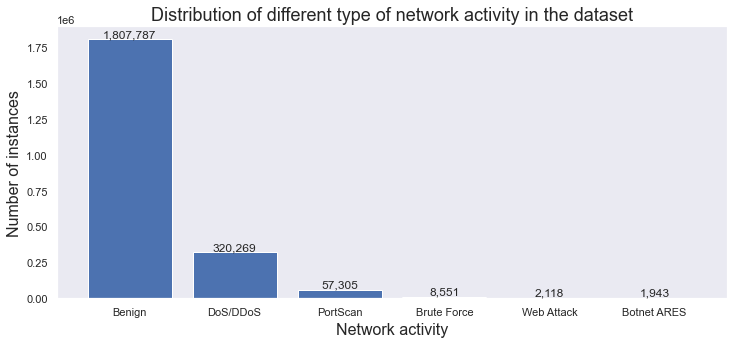

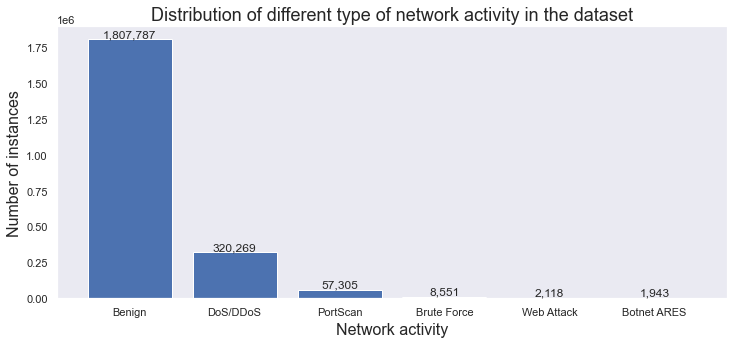

In [63]:
fig = plt.figure(figsize=(12, 5))

attack = dataset['label_category'].value_counts()

attack_count = attack.values
attack_type = attack.index

bar = plt.bar(attack_type, attack_count, align='center')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ','), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of different type of network activity in the dataset', fontsize=18)
plt.xlabel('Network activity', fontsize=16)
plt.ylabel('Number of instances', fontsize=16)
plt.grid()
plt.show()
fig.savefig('../../images/network_activity_category.pdf')

### Port Usage Comparaison

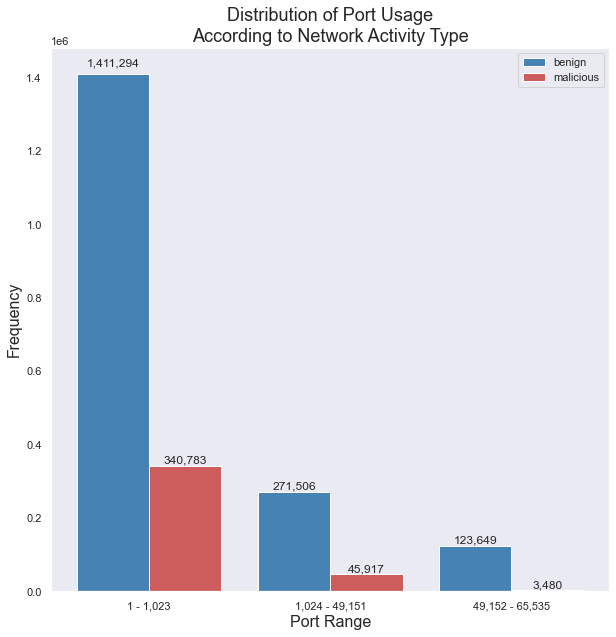

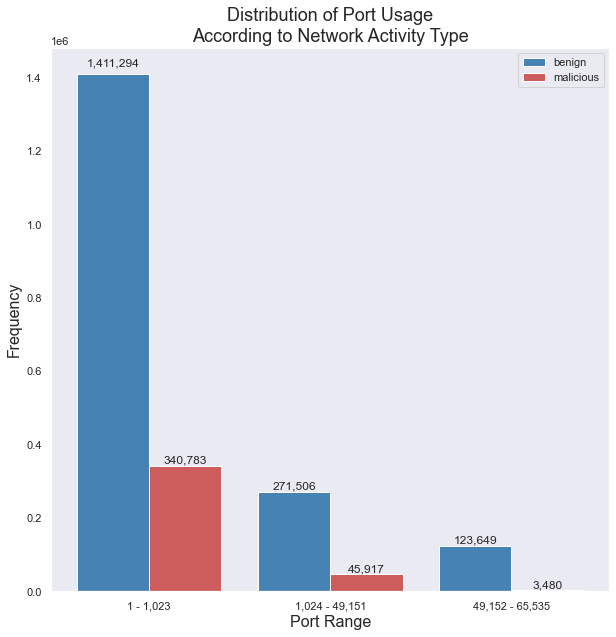

In [64]:
fig, ax = plt.subplots(figsize=(10,10))

benign_ports = dataset.loc[dataset['label'] == 'BENIGN', 'destination_port_category']
malicious_ports = dataset.loc[dataset['label'] != 'BENIGN', 'destination_port_category']

# get rid of rows with specific value
benign_ports = benign_ports[benign_ports != "0"]
malicious_ports = malicious_ports[malicious_ports != "0"]

# sum each port category column
benign_ports = benign_ports.value_counts()
malicious_ports = malicious_ports.value_counts()

indexes = np.arange(3)
width = 0.4
rect1 = plt.bar(indexes, benign_ports.values, width, color="steelblue", label="benign")
rect2 = plt.bar(indexes + width, malicious_ports.values, width, color="indianred", label="malicious")

def add_text(rect):
    # add text to top of each bar
    for r in rect:
        h = r.get_height()
        plt.text(r.get_x() + r.get_width()/2, h*1.01, s=format(h, ",") ,fontsize=12, ha='center', va='bottom')

add_text(rect1)
add_text(rect2)

ax.set_xticks(indexes + width / 2)
ax.set_xticklabels(["1 - 1,023", "1,024 - 49,151", "49,152 - 65,535"])
plt.title('Distribution of Port Usage\nAccording to Network Activity Type', fontsize=18)
plt.xlabel('Port Range', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend()
plt.grid()
plt.show()
fig.savefig('../../images/port_usage_comparison.pdf')

### Scatter plot

Scatter plot shows data distribution of a pair of features, it can visuallly reveal the relationship between a feature pair.

## Data Preparation
------------------------------------------------

### Data Splitting

First step to data preparation is splitting the data into traning and testing sets. For this there already exists sklearn function that does all the splitting for us. This step is important so we can have representative data for evaluating our model. Both train and test samples should contain similar data variance.

In [66]:
labels = dataset['label_category']
features = dataset.drop(labels=['label', 'label_category', 'destination_port_category'], axis=1)

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42, stratify=labels)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [68]:
X_train.shape, X_test.shape, X_val.shape

((1318783, 49), (439595, 49), (439595, 49))

((1318783, 49), (439595, 49), (439595, 49))

### Scaling features to a range

In [69]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer

In [70]:
categorical_features = features.select_dtypes(exclude=["int64", "float64"]).columns
numeric_features = features.select_dtypes(exclude=[object]).columns

preprocessor = ColumnTransformer(transformers=[
    ('categoricals', OneHotEncoder(drop='first', sparse=False, handle_unknown='error'), categorical_features),
    ('numericals', QuantileTransformer(), numeric_features)
])

Preprocess the features

In [71]:
columns = numeric_features.tolist()

X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=columns)
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=columns)
X_val = pd.DataFrame(preprocessor.transform(X_val), columns=columns)

Preprocess the labels

In [72]:
le = LabelEncoder()

y_train = pd.DataFrame(le.fit_transform(y_train), columns=["label"])
y_test = pd.DataFrame(le.transform(y_test), columns=["label"])
y_val = pd.DataFrame(le.transform(y_val), columns=["label"])

In [74]:
y_train.value_counts()

label
0        1084671
3         192161
4          34383
2           5131
5           1271
1           1166
dtype: int64

label
0        1084671
3         192161
4          34383
2           5131
5           1271
1           1166
dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

def balance_dataset(X, y, undersampling_strategy, oversampling_strategy):

    under_sampler = RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state=0)
    X_under, y_under = under_sampler.fit_resample(X, y)

    over_sampler = SMOTE(sampling_strategy=oversampling_strategy)
    X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)
    
    return X_bal, y_bal

***Label Encoder Transformation***
```json
{
    'Benign': 0,
    'DoS/DDoS': 3,
    'PortScan': 4,
    'Brute Force': 2,
    'Web Attack': 5,
    'Botnet ARES': 1
}
```

In [ ]:
undersampling_strategy = {
    0: 800000,
    3: 192161,
    4: 34383,
    2: 5131,
    5: 1271,
    1: 1166,
}

oversampling_strategy = {
    0: 800000,
    3: 212102,
    4: 44460,
    2: 50115,
    5: 50284,
    1: 50149,
}

X_train_bal, y_train_bal = balance_dataset(X_train, y_train, undersampling_strategy, oversampling_strategy)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

# sum each port category column
imbalanced = y_train.value_counts()
balanced = y_train_bal.value_counts()

indexes = np.arange(6)
width = 0.4
rect1 = plt.bar(indexes, imbalanced.values, width, color="steelblue", label="imbalanced")
rect2 = plt.bar(indexes + width, balanced.values, width, color="indianred", label="balanced")

def add_text(rect):
    # add text to top of each bar
    for r in rect:
        h = r.get_height()
        plt.text(r.get_x() + r.get_width()/2, h*1.01, s=format(h, ",") ,fontsize=12, ha='center', va='bottom')

add_text(rect1)
add_text(rect2)

ax.set_xticks(indexes + width / 2)
ax.set_xticklabels(['Benign', 'DoS/DDoS', 'PortScan', 'Brute Force', 'Web Attack', 'Botnet ARES'])
#plt.title('# instances according to network activity type', fontsize=18)
plt.xlabel('Traffic Activity', fontsize=16)
plt.ylabel('# instances', fontsize=16)
plt.legend()
plt.grid()
plt.show()
fig.savefig('../../images/balanced_dataset.pdf')

In [ ]:
X_train_bal.to_pickle('../../datasets/train/train_features_balanced.pkl')
X_val.to_pickle('../../datasets/val/val_features.pkl')
X_test.to_pickle('../../datasets/test/test_features.pkl')

y_train_bal.to_pickle('../../datasets/train/train_labels_balanced.pkl')
y_val.to_pickle('../../datasets/val/val_labels.pkl')
y_test.to_pickle('../../datasets/test/test_labels.pkl')